**What is a computer vision problem?**
* Binary classification problem
* Multi-class classification
* Object detection


#Introduction to convolutional neural networks and computer vision with tensorflow

Computer vision is the practice of writing
algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognize the car in front.

## Get the data 

the images we're working with are from the food101 dataset (101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However we've modified it to only use 2 classses (pizza and steak) using the image data modification notebook (check danial's github)

>**Note:** we start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up

In [47]:
import zipfile

#download to gg colab
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzip downloaded file

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-04-21 13:57:42--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.26.128, 172.217.193.128, 74.125.134.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.26.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   171MB/s    in 0.6s    

2023-04-21 13:57:43 (171 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project, this usually means visualizing many samples of your data


In [48]:
!ls pizza_steak


test  train


In [49]:
!ls pizza_steak/train/

pizza  steak


In [50]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [51]:
import os

#walkthrough the pizza_steak directory and list number of files

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

there are 2 directories and 0 images in 'pizza_steak'.
there are 2 directories and 0 images in 'pizza_steak/train'.
there are 0 directories and 750 images in 'pizza_steak/train/steak'.
there are 0 directories and 750 images in 'pizza_steak/train/pizza'.
there are 2 directories and 0 images in 'pizza_steak/test'.
there are 0 directories and 250 images in 'pizza_steak/test/steak'.
there are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [52]:
# Another way to find out how many images in a file

num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, first let's get the class names programmatically

In [53]:
#get the classnames programmatically

import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the sub directories 
# if ds_store appear then we will need to remove it
print(class_names)

['pizza' 'steak']


In [54]:
#let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mping
import random

def view_random_image(target_dir, target_class):
  #setup the target directory (we'll view images from here)
  target_folder = target_dir +"/"+ target_class

  #get a random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)
  #read in the image and plot it using matplotlib

  img = mping.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"image shape: {img.shape}") #show the shape of the image
  return img

['1138936.jpg']
image shape: (512, 512, 3)


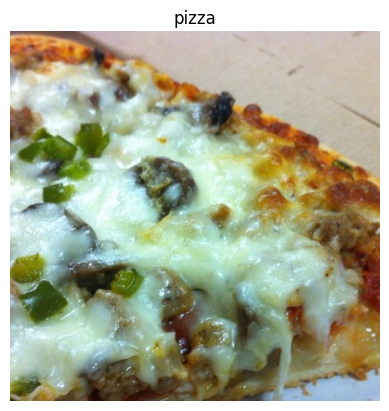

In [55]:
#view random image from the training dataset
img = view_random_image(target_dir = "pizza_steak/train",
                        target_class = "pizza")

In [56]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[117,  93,  93],
        [119,  93,  94],
        [118,  92,  93],
        ...,
        [206, 191, 188],
        [208, 193, 188],
        [209, 194, 189]],

       [[119,  95,  93],
        [120,  96,  94],
        [120,  96,  94],
        ...,
        [207, 192, 189],
        [207, 192, 187],
        [208, 193, 188]],

       [[115,  94,  89],
        [117,  96,  91],
        [121,  97,  93],
        ...,
        [208, 193, 190],
        [207, 192, 187],
        [207, 192, 187]],

       ...,

       [[ 61,  48,   0],
        [ 65,  53,   1],
        [ 68,  58,   9],
        ...,
        [172, 196, 232],
        [171, 195, 231],
        [169, 193, 229]],

       [[ 65,  50,   7],
        [ 62,  49,   7],
        [ 54,  42,   2],
        ...,
        [171, 195, 233],
        [170, 194, 232],
        [168, 192, 230]],

       [[ 59,  43,   9],
        [ 60,  45,  12],
        [ 56,  43,   9],
        ...,
        [167, 191, 22

In [57]:
#view the image shape
img.shape # return width, height, colour channels

(512, 512, 3)

In [58]:
#get all the pixel values between 0 and 1
img/225.

array([[[0.52      , 0.41333333, 0.41333333],
        [0.52888889, 0.41333333, 0.41777778],
        [0.52444444, 0.40888889, 0.41333333],
        ...,
        [0.91555556, 0.84888889, 0.83555556],
        [0.92444444, 0.85777778, 0.83555556],
        [0.92888889, 0.86222222, 0.84      ]],

       [[0.52888889, 0.42222222, 0.41333333],
        [0.53333333, 0.42666667, 0.41777778],
        [0.53333333, 0.42666667, 0.41777778],
        ...,
        [0.92      , 0.85333333, 0.84      ],
        [0.92      , 0.85333333, 0.83111111],
        [0.92444444, 0.85777778, 0.83555556]],

       [[0.51111111, 0.41777778, 0.39555556],
        [0.52      , 0.42666667, 0.40444444],
        [0.53777778, 0.43111111, 0.41333333],
        ...,
        [0.92444444, 0.85777778, 0.84444444],
        [0.92      , 0.85333333, 0.83111111],
        [0.92      , 0.85333333, 0.83111111]],

       ...,

       [[0.27111111, 0.21333333, 0.        ],
        [0.28888889, 0.23555556, 0.00444444],
        [0.30222222, 0

## an end-to-end example

let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:
* load our images
* preprocess images
* build a CNN to find patterns in our images
* compile our CNN
*fit our CNN to our training data

In [59]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

#set the seed
tf.random.set_seed(42)

#preprocess data (get all of the pixel values between 0 and 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

#set up paths to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

#import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size=32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed=42)
test_data = valid_datagen.flow_from_directory(directory = test_dir,
                                              batch_size = 32,
                                              target_size = (224,224),
                                              class_mode = "binary",
                                              seed = 42)

print(test_data)
#Build a CNN model(same as tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = "relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                             padding ="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")

])


#Compile our function

model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.legacy.Adam(),
                metrics = ["accuracy"])

#fit the model
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps = len(test_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 11s 219ms/step - loss: 0.6696 - accuracy: 0.5733 - val_loss: 0.6286 - val_accuracy: 0.7240
Epoch 2/5
47/47 [==============================] - 11s 227ms/step - loss: 0.5671 - accuracy: 0.7067 - val_loss: 0.4470 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 10s 223ms/step - loss: 0.4445 - accuracy: 0.7973 - val_loss: 0.3814 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 10s 221ms/step - loss: 0.3939 - accuracy: 0.8200 - val_loss: 0.3208 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 10s 221ms/step - loss: 0.3693 - accuracy: 0.8473 - val_loss: 0.3314 - val_accuracy: 0.8860


>**note:** if the above cell is taking longer than 10s seconds per epoch, make sure you're using a GPU by going to Runtime -> Change runtime type -> Hardware accelerator -> GPU (you may have to return some cells above after doing this)

In [60]:
#Get a model summary
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_11 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_13 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

## using the same model as before

let's replication the model we've built in the previous section to see if it works with our image data

In [61]:
#set random seed
tf.random.set_seed(42)

#Create a model to replication the tensorflow playground model

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation ="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


#compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 212ms/step - loss: 0.9148 - accuracy: 0.4893 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 191ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 212ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 210ms/step - loss: 0.6932 - accuracy: 0.4880 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 208ms/step - loss: 0.6932 - accuracy: 0.4693 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
#get a summary of model_2
model_2.summary()

Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly... Let's try to improve it

In [ ]:
#update the model above

#set random seed
tf.random.set_seed(42)

#create the model
model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])


#compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.legacy.Adam(),
                metrics=["accuracy"])


#fit the model
model_3.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))

In [62]:
#get a summary of model_3

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


**note:** you can think of trainable parameters as **patterns a model can learn from data**. Intuitively, you might think more is better. And in lots of cases, it is. But in this case, the difference here is the 2 different styles of model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional seeks to sort our and learn the most important patterns in an image** so even through these are less learnable parameters in our convolutional neural network, these are often more helpful in deciphering between **features** in an image.

## Binary classification: let's break it down

1. become 1 with the data (visualize, visualize, visualize)
2. preprocess the data (prepared it for our model, the main step here was scaling/ normalizing and turing our data into batches)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repear until satisfied (experiment, experiment, experiment)


### 1. become one with the data

In [ ]:
#visualize the data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train", "pizza")

### 2. preprocess the data (prepare it for the model)

In [ ]:
#Define directory data paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"



Next step is to turn our data into **batches**.


a batch is a small subset of our data. rather than look at all the data at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images or more might not fit into the memory of your processor (GPU)
2. Trying to learn the patterns in 10,000 in 1 hit could result in the model not being able to learn very well.

Why 32?

because 32 is good for your health...

In [63]:
# Create train and test data generator and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)


In [64]:

#path to our data
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

#generate the data
train_data = train_datagen.flow_from_directory(directory = train_dir, #target directory of image
                                               target_size = (224,224), #target size of image (height, width)
                                               class_mode = "binary", #type of data you're working with
                                               batch_size = 32, # size of mini batches to load data into
                                               seed = 42
                                               )
test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size = (224,224),
                                             class_mode = "binary",
                                             batch_size = 32,
                                             seed = 42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [65]:
#get a sample of a training data batch
images, labels = train_data.next() # get the "next" batch of images/ label in the train data
len(images), len(labels)

(32, 32)

In [66]:
#how many batches are there
len(train_data)

47

In [67]:
# get the first 2 images
images[:2], images[0].shape

(array([[[[0.42352945, 0.43137258, 0.34509805],
          [0.31764707, 0.3254902 , 0.2392157 ],
          [0.26666668, 0.28235295, 0.18431373],
          ...,
          [0.42352945, 0.34901962, 0.37254903],
          [0.427451  , 0.34901962, 0.39607847],
          [0.45098042, 0.36862746, 0.427451  ]],
 
         [[0.2901961 , 0.30588236, 0.21568629],
          [0.45882356, 0.47450984, 0.37647063],
          [0.2627451 , 0.28627452, 0.18431373],
          ...,
          [0.39607847, 0.34117648, 0.34117648],
          [0.4156863 , 0.36862746, 0.37647063],
          [0.39607847, 0.34901962, 0.3647059 ]],
 
         [[0.37254903, 0.39607847, 0.29411766],
          [0.39607847, 0.41960788, 0.31764707],
          [0.30588236, 0.34117648, 0.23529413],
          ...,
          [0.34509805, 0.3254902 , 0.3019608 ],
          [0.30980393, 0.29803923, 0.27058825],
          [0.3372549 , 0.3254902 , 0.30588236]],
 
         ...,
 
         [[0.5137255 , 0.5019608 , 0.54509807],
          [0.52156

In [68]:
images[7].shape

(224, 224, 3)

In [69]:
# view the first batch of labels
labels

array([1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.],
      dtype=float32)

###3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when begining a machine learning experiment and then as you keep experimenting, you try to beat the baseline

> **Note:** In deep learning, there is almost infinite amount of architectures you could create. So one of the beset ways to get started is to start with something  simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the file of your problem).

In [70]:
#make the creating of our model a little easier
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [71]:
#create the model
model_4 = Sequential([
    Conv2D(filters = 10, #filter is the number of sliding windows going across the imput => higher => more complex
           kernel_size = (3,3), #the size of the sliding window goes across an input
           strides =(1,1), # the size of the step sliding window takes across an input
           padding = "valid", # if same => output shape is same as input shape, if valid => output shape gets compressed
           activation = "relu",
           input_shape = (224,224,3)), #input layer ( specifiy input shape)
    Conv2D(10,3,activation = "relu"),
    Conv2D(10,3, activation = "relu"),
    Flatten(),
    Dense(1 , activation = "sigmoid") # output layer (working with binary classification so only 1 output neuron)

    
])

### 3. comile the model

In [72]:
#compile the model
model_4.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics=["accuracy"])

In [73]:
#get a summary of our model
model_4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_15 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_16 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_7 (Flatten)         (None, 475240)            0         
                                                                 
 dense_14 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


###4. fit the model

In [74]:
#check length of training and testing data generator
len(train_data), len(test_data)

(47, 16)

In [75]:
#fit the model
history_4 = model_4.fit(train_data, #this is a combination of labels and sample data
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 226ms/step - loss: 1.2264 - accuracy: 0.6353 - val_loss: 0.4830 - val_accuracy: 0.8100
Epoch 2/5
47/47 [==============================] - 10s 207ms/step - loss: 0.4422 - accuracy: 0.8013 - val_loss: 0.3713 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 10s 220ms/step - loss: 0.3452 - accuracy: 0.8613 - val_loss: 0.3406 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 10s 219ms/step - loss: 0.2063 - accuracy: 0.9313 - val_loss: 0.3893 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 10s 219ms/step - loss: 0.0879 - accuracy: 0.9833 - val_loss: 0.4291 - val_accuracy: 0.8360


In [ ]:
model_1.evaluate(test_data)

In [ ]:
model_4.evaluate(test_data)

### 5. Evaluating our model

it looks like our model is learning something, let's evaluate it

In [ ]:
#let's plot the loss curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize = (10,7))

In [ ]:
#plot the validation and training curves separately
def plot_loss_curves(history):
  """
  returns separate loss curves for training and validation metrics
  """
  
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) #how many epochs did we run for

  #plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()


  plt.figure()
  #plot accuracy
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

> **Note:** when a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished

In [ ]:
#check out the loss and accuracy
plot_loss_curves(history_4)

###6. adjust the model parameters

Fitting a machine learning model com in 3 steps:

0. create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting


ways to induce overfitting:
* increase the number of conv layers
* increate the number of conv filters
* add another dense layer to the output of our flattened layer

Reduce overfitting:
* add data augmentation
* add regularization layers (such as MaxPool2D
* Add more data...

>**note:** reducing overfitting is also known as **regularization**

In [ ]:
#Create the model (this is going to be our new baseline)

model_5 = Sequential([
    Conv2D(10,3,activation = "relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
#Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer = Adam(),
                metrics=["accuracy"])

history_5 = model_5.fit(train_data,
                        epochs = 5,
                        steps_per_epoch=len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

In [ ]:
#get a summary of or model with max pooling
model_5.summary()

In [ ]:
#plot loss curves
plot_loss_curves(history_5)

### opening our bag of tricks and finding data augmentation

In [ ]:
#Create ImageDataGenerator training instance with data augmentation

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, #how much do you want to rotate an image
                                             shear_range=0.2, # how much do you want to shear an image
                                             zoom_range=0.2, #zoom in randomly an image
                                             width_shift_range=0.2, #move random in x-axis
                                             height_shift_range = 0.2, #move random in y-axis
                                             horizontal_flip=True) #do you want to flip an image
#Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale = 1/255.)

#create ImageDataGenerator for test data
test_datagen = ImageDataGenerator(rescale=1/255.)


>**Question:** what is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might means adjusting the rotation of an image, flipping it or cropping it....

Let's write some code to visulaize data augmentation..

In [ ]:
IMG_SIZE = (224,224)


#import data and augment it from training directory
print("augmented training data")

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size= IMG_SIZE,
                                                                   batch_size = 32,
                                                                   class_mode="binary",
                                                                   shuffle=False) #for demonstation purposes only

#create non-augmented train data batches
print("non-augmented train data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMG_SIZE,
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

#create non-augmented test data batches
print("non-augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary"
                                             )



**Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our image are left as they are in the directories but are modified as they're lo.aded into the model


Finally... let's visualize some augmented data!!!

In [ ]:
#Get sample augmented data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() #note: labels aren't augmented... only data images

In [ ]:
#show the original images and augmented image
import random
random_number = random.randint(0,32) # our batch sizes are 32
print(f"showing image number:{random_number}")
plt.imshow(images[random_number])

plt.title(f"original image")
plt.axis(False)
plt.figure()

plt.imshow(augmented_images[random_number])
plt.title(f"augmented image")
plt.axis(False)


Now we've seen what augmented training data looks like, let's build a model and see how it learns on augmented data

In [ ]:
# Create a model (same as model 5)

model_6 = Sequential ([
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

#Compile the model
model_6.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_6=model_6.fit(train_data_augmented, #fitting model_6 on augmented trainind data
                      epochs = 5,
                      steps_per_epoch = len(train_data_augmented),
                      validation_data = test_data,
                      validation_steps = len(test_data))

In [ ]:
#Check our model training curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (the same as before) on it and see what happens

In [ ]:
#reimport data and augmented it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size = IMG_SIZE,
                                                                            batch_size = 32,
                                                                            class_mode = "binary",
                                                                            seed=42)

In [76]:
#set random seed
tf.random.set_seed(42)

#Create a model
model_7 = Sequential([
    Conv2D(10,3,activation="relu",input_shape = (224,224,3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")

])

#compile the model
model_7.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.legacy.Adam(),
                metrics=["accuracy"])


#fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, #we're fitting on augmented data and shuffle
            epochs= 5,
            steps_per_epoch=len(train_data_augmented_shuffled),
            validation_data = test_data,
            validation_steps = len(test_data)
            )

NameError: ignored

In [ ]:
#summary of model 7
model_7.summary()

In [ ]:
plot_loss_curves(history_7)

### 7. repeat until satisfied

Since we've already beaten our baseline, there're only a few things that we could try to continue improve our model:
* Increase the number of model layers (e.g. add more `Conv2D`/`MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer(more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learnt and adjust it for our own use case

> **practice:** Recreate the model on CNN explainer website (same as model_1) and see how it performs on the augmented shuffled training data

In [ ]:
#for practice
#create the model
model_p = Sequential ([
    Conv2D(10,3,activation = "relu", input_shape = (224,224,3)),
    Conv2D(10,3,activation= "relu"),
    MaxPool2D(),
    Conv2D(10,3,activation = "relu"),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

#compile the model
model_p.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])


#fit the model
history_p = model_p.fit(train_data_augmented_shuffled,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented_shuffled),
                        validation_data = test_data,
                        validation_steps = len(test_data))

## making a prediction with our trained model on our own custom data

In [ ]:
#Classes  we're working with 
print(class_names)

In [ ]:
#view our example 
import matplotlib.image as mping
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mping.imread("03-steak.jpeg")

In [ ]:
#plot the image
plt.imshow(steak)
plt.axis(False)

In [ ]:
#Check the shape of our image
steak.shape

**Note:** when you train a neural network and you want to make a prediction with it on your own custom data, it's important than your custom data (or new data) is preprocessed into the same format as the data your model was trained on

In [ ]:
#Create a function to import an image and resize it to be able to add into our model

def load_and_prep_image(filename, img_shape=224):
 """
 read an image from file name, turns it into a tensor and reshapes it to (img_shape, img_shape, color_channels)
 """

 #read in the image
 img = tf.io.read_file(filename)
 #decode the read file into a tensor
 img = tf.image.decode_image(img)
 #resize the image
 img = tf.image.resize(img, size = [img_shape, img_shape])
 #rescale the image and get all values between 0 and 1
 img= img/255.
 #expand the dimension of the img to include the batch size
 img = tf.expand_dims(img, axis = 0)
 return img

In [ ]:
#load in an preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak.shape

In [ ]:
pred = model_7.predict(steak)

Looks like our custom image is being put through our model, however it currently outputs a prediction probability' wouldnt it be nice if we could visualize the image as well as the model's prediction

In [ ]:
#remind ourselves of our class name
class_names



In [ ]:
#we can index the predicted class by rounding the prediction probability and indexing it on the class_names
pred_class = class_names[int(tf.round(pred))]
pred_class

In [ ]:
def pred_and_plot(model, filename, class_names = class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots the image with the 
  predicted class as the title.
  """

  #import the target image and preprocessed it
  img = load_and_prep_image(filename)

  #make a prediction
  pred = model.predict(img)

  #get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  #plot the image and predicted class
  plt.imshow(tf.squeeze(img))
  plt.title(f"prediction:{pred_class}")
  plt.axis(False)

In [ ]:
#test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg")

In [ ]:
#get a custom pizza image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg



In [ ]:
pred_and_plot(model_7, "03-steak.jpeg")

## multi-class image classification

We've been through a bunch of the following steps with a binary classification problem (pizza vs. steak)m now we're going to step things up a notch with 10 classes of food (multi-class classification)

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfitting it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

## 1. import and become one with the data

In [77]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2023-04-21 14:01:48--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.13.128, 74.125.26.128, 172.217.193.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.13.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  90.2MB/s    in 5.8s    

2023-04-21 14:01:54 (85.8 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [78]:
import os
#walkthough 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images  '{dirpath}'.")

there are 2 directories and 0 images  '10_food_classes_all_data'.
there are 10 directories and 0 images  '10_food_classes_all_data/train'.
there are 0 directories and 750 images  '10_food_classes_all_data/train/sushi'.
there are 0 directories and 750 images  '10_food_classes_all_data/train/fried_rice'.
there are 0 directories and 750 images  '10_food_classes_all_data/train/ice_cream'.
there are 0 directories and 750 images  '10_food_classes_all_data/train/ramen'.
there are 0 directories and 750 images  '10_food_classes_all_data/train/chicken_wings'.
there are 0 directories and 750 images  '10_food_classes_all_data/train/grilled_salmon'.
there are 0 directories and 750 images  '10_food_classes_all_data/train/steak'.
there are 0 directories and 750 images  '10_food_classes_all_data/train/pizza'.
there are 0 directories and 750 images  '10_food_classes_all_data/train/chicken_curry'.
there are 0 directories and 750 images  '10_food_classes_all_data/train/hamburger'.
there are 10 directorie

In [79]:
!ls -la 10_food_classes_all_data/

total 16
drwxr-xr-x  4 root root 4096 Apr 21 14:01 .
drwxr-xr-x  1 root root 4096 Apr 21 14:01 ..
drwxr-xr-x 12 root root 4096 Apr 21 14:01 test
drwxr-xr-x 12 root root 4096 Apr 21 14:01 train


In [80]:
#setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [81]:
#let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['690558.jpg']
image shape: (384, 512, 3)


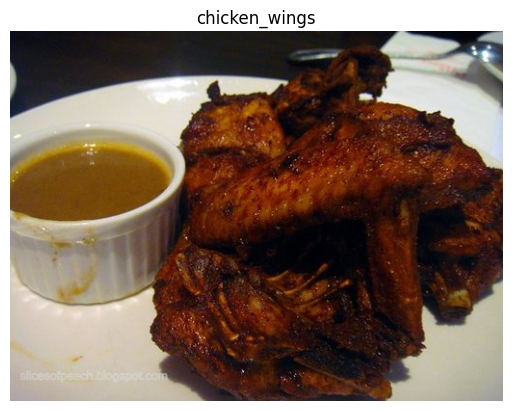

In [84]:
#Visualize , visualize, visualize
import random 
img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

In [83]:
random.choice(class_names)

'sushi'

### 2. Preprocess the data (prepare it for a model)

In [85]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Rescale 
train_datagen = ImageDataGenerator(rescale = 1/255.) 
test_datagen = ImageDataGenerator(rescale = 1/255.)


IMG_SIZE = (224,224)
#load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = "categorical"
                                               )

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = "categorical")



Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

We've been taking alot about the CNN explainer website... how about we just take their model (also on 10 classes) and use it for our problem...?

In [92]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense                    

#set random seed
tf.random.set_seed(42)

#create a model (similar to CNN explainer website)
model_8 = Sequential([
    Conv2D(10,3,activation = "relu",input_shape = (224,224,3)),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Conv2D(10,3,activation = "relu"),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = "softmax") # change to 10 neurons + softmax activation function

])

#compile the model
model_8.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])




### 4. fit a model

In [93]:
#fit the model
history_8 = model_8.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 52s 213ms/step - loss: 2.1307 - accuracy: 0.2245 - val_loss: 1.9383 - val_accuracy: 0.3156
Epoch 2/5
235/235 [==============================] - 49s 208ms/step - loss: 1.8451 - accuracy: 0.3703 - val_loss: 1.8228 - val_accuracy: 0.3636
Epoch 3/5
235/235 [==============================] - 49s 211ms/step - loss: 1.5275 - accuracy: 0.4864 - val_loss: 1.8987 - val_accuracy: 0.3612
Epoch 4/5
235/235 [==============================] - 60s 256ms/step - loss: 1.0152 - accuracy: 0.6624 - val_loss: 2.2710 - val_accuracy: 0.2996
Epoch 5/5
235/235 [==============================] - 58s 248ms/step - loss: 0.5187 - accuracy: 0.8343 - val_loss: 3.2808 - val_accuracy: 0.3008


###5. evaluate the model

In [94]:
#Evaluate on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 12s 150ms/step - loss: 3.2808 - accuracy: 0.3008


[3.2808377742767334, 0.30079999566078186]

In [95]:
#plot the validation and training curves separately
def plot_loss_curves(history):
  """
  returns separate loss curves for training and validation metrics
  """
  
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) #how many epochs did we run for

  #plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()


  plt.figure()
  #plot accuracy
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

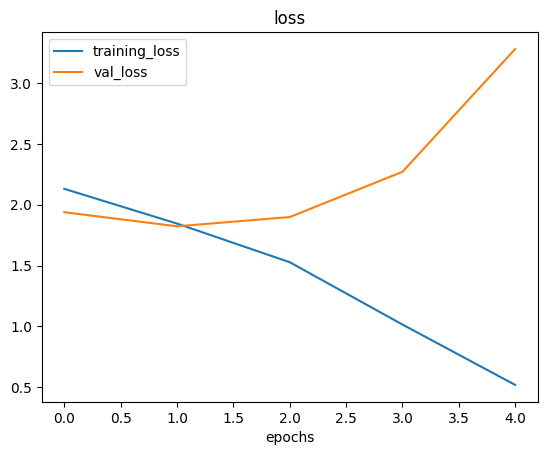

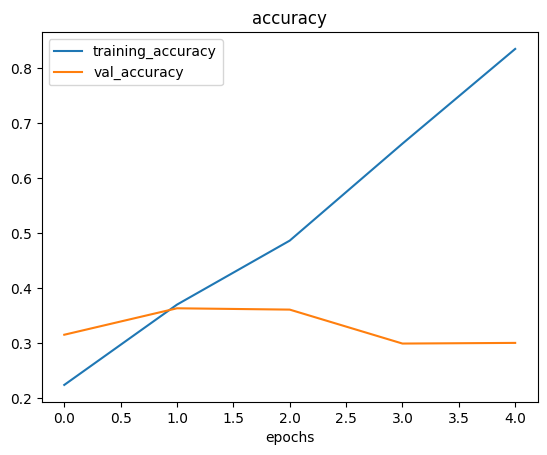

In [96]:
#check out the model lost curves
plot_loss_curves(history_8)

What do this loss curves tell us?

Well... it seems our model is **overfitting** the training set quite badly... in other words, it's getting great results on the training data but fails to generalize well and perform poorly against unseen data

### 6. adjust the model hyperparameters to beat the baseline (reduce overfitting)

Due to its performance on the training data, it's clear our model is learning something...

However, it's not generalizing well to unseen data (overfiting)

so let's try and fix it by:
1. **get more data** - having more data gives a model more opportunity to learn diverse pattern
2. **Simplfiy the model** -  if our current model is overfiting the data, it may be too complicated of a model, one way to simplify a model is to reduce the number of layers or reduce number of hidden units in layers
3. **use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)
4. **Use transfer learning** - transfer learning leverage the patterns another model has learned on similar data to your down and allows you to use those patterns on your own data set